# Pre-process function

In [2]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
import re    

def preprocess(file_dir):
    stopWords = set(stopwords.words('english'))
    processed_text = []

    # WordNet can take POS tags too
    lemmatizer = WordNetLemmatizer()

    # Title pattern
    title = re.compile(r"%&%.*%&%")

    # read
    text = open(file_dir, 'r', encoding = 'utf-8').read()

    # replace title with blank
    text = re.sub(title, "", text)

    # rids special chars and lower cases
    text = simple_preprocess(text)

    # filters stop words
    text = [word for word in text if word not in stopWords]

    # lemmatization
    text = [lemmatizer.lemmatize(word) for word in text]

    return text # list of processed words

c:\nlp\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


### Get file list from dir

In [1]:
import os

directory = r"D:\COCA & GloWbE\COCA\Pre-processed Text\Science-related texts"
file_list = [file for file in os.listdir(directory) if file.endswith('.txt')]

print( len(file_list), "text files detected!")

10258 text files detected!


In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_cloud(text):
    plt.figure()
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title("Text:" + text)
    plt.show()
    
    
#         wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

File name: acad_5783.txt


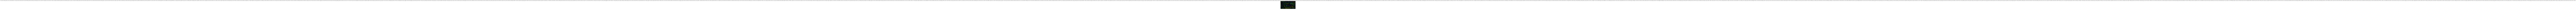

In [52]:
import matplotlib.pyplot as plt
    

for file in file_list[1:2]:
    print("File name:", file)
    processed = preprocess(os.path.join(directory, file))
    processed = ' '.join(processed)
    
    draw_cloud(processed)

### * In case of converting list to counts

In [47]:
from collections import Counter
counts = dict(Counter(text))
print(counts)

{'abrons': 1,
 'acting': 1,
 'activist': 1,
 'aczel': 1,
 'add': 1,
 'address': 1,
 'adolescence': 1,
 'adult': 1,
 'adventure': 1,
 'african': 2,
 'agard': 1,
 'age': 2,
 'also': 3,
 'alternative': 1,
 'amateur': 1,
 'america': 1,
 'american': 5,
 'amherst': 1,
 'amir': 1,
 'amnh': 7,
 'among': 2,
 'ancestry': 1,
 'andrew': 1,
 'animal': 1,
 'anmh': 1,
 'anthropologist': 2,
 'anthropology': 8,
 'apart': 2,
 'appeared': 1,
 'appointed': 1,
 'appropriation': 1,
 'aquagenesis': 1,
 'arab': 1,
 'arizona': 1,
 'arrived': 1,
 'arriving': 1,
 'art': 2,
 'article': 1,
 'artifact': 3,
 'artist': 4,
 'artistic': 1,
 'asian': 1,
 'assistant': 2,
 'associate': 1,
 'association': 1,
 'astronomer': 3,
 'astronomy': 2,
 'astrophysics': 2,
 'attic': 1,
 'author': 5,
 'available': 1,
 'avoided': 1,
 'ayanda': 1,
 'balinese': 1,
 'barnard': 1,
 'bartol': 1,
 'based': 2,
 'beat': 1,
 'became': 2,
 'become': 1,
 'began': 1,
 'beginning': 1,
 'behavior': 1,
 'belief': 1,
 'beyond': 1,
 'biodiversity': 1,
